In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [2]:
# Définition des chemins des données
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(dataset_path), "cats_and_dogs_filtered")
train_dir = os.path.join(data_dir, "train")
validation_dir = os.path.join(data_dir, "validation")

68606236/68606236 [==============================] - 2s 0us/step


In [3]:
# Préparation des générateurs de données
image_size = (150, 150)
batch_size = 32


In [4]:
datagen_train = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_validation = ImageDataGenerator(rescale=1./255)


In [5]:
# Chargement des images depuis les dossiers
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Classification binaire (chien vs chat)
)

validation_generator = datagen_validation.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


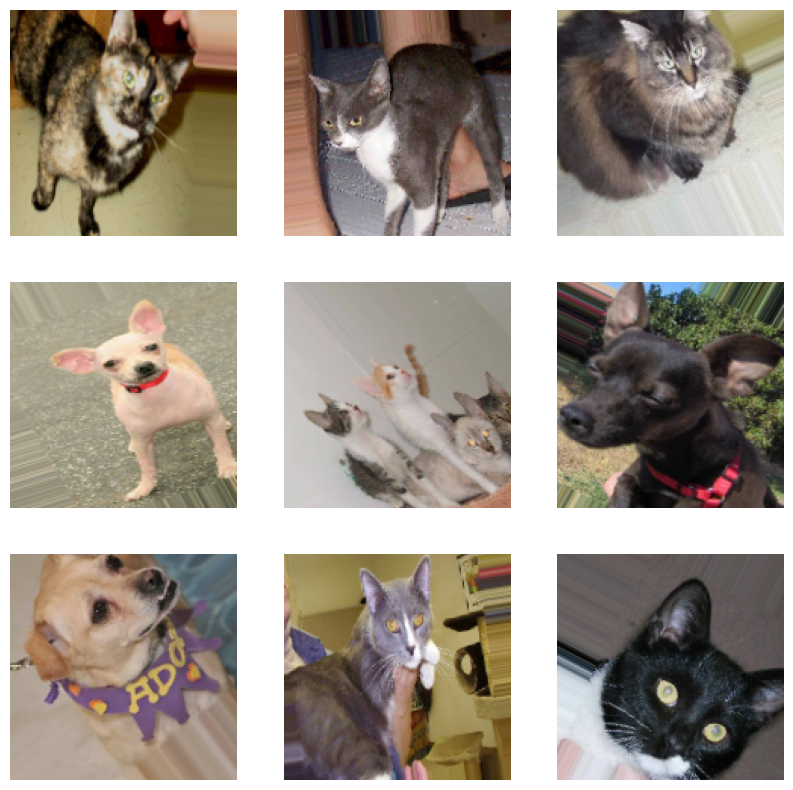

In [6]:
# Affichage de quelques images pour vérification
def plot_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

plot_images(train_generator)


In [7]:
# Construction du modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
# Affichage du résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

NameError: name 'history' is not defined

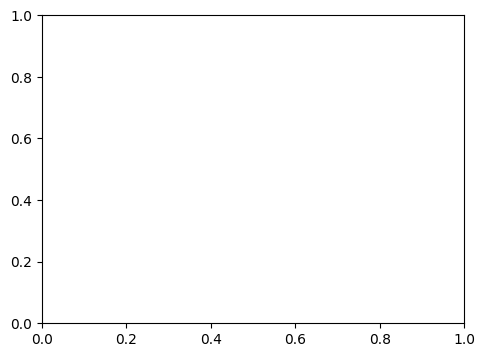

In [10]:
# Visualisation des performances
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [11]:
epochs = 15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/15
63/63 [==============================] - 21s 317ms/step - loss: 0.6971 - accuracy: 0.5070 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 19s 293ms/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6924 - val_accuracy: 0.5600
Epoch 3/15
63/63 [==============================] - 19s 296ms/step - loss: 0.6919 - accuracy: 0.5300 - val_loss: 0.6825 - val_accuracy: 0.5040
Epoch 4/15
63/63 [==============================] - 19s 293ms/step - loss: 0.6889 - accuracy: 0.5330 - val_loss: 0.6737 - val_accuracy: 0.5460
Epoch 5/15
63/63 [==============================] - 19s 295ms/step - loss: 0.6798 - accuracy: 0.5745 - val_loss: 0.6665 - val_accuracy: 0.6010
Epoch 6/15
63/63 [==============================] - 20s 310ms/step - loss: 0.6843 - accuracy: 0.5575 - val_loss: 0.6782 - val_accuracy: 0.5720
Epoch 7/15
63/63 [==============================] - 19s 305ms/step - loss: 0.6801 - accuracy: 0.5610 - val_loss: 0.6775 - val_accuracy: 0.5680

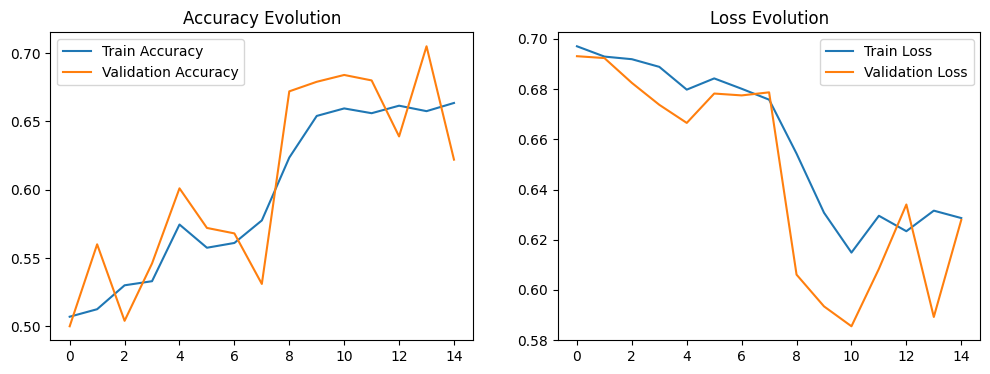

In [12]:
# Visualisation des performances
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
plt.show()


j'ai ajouté la nouvelle image dans le projet 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


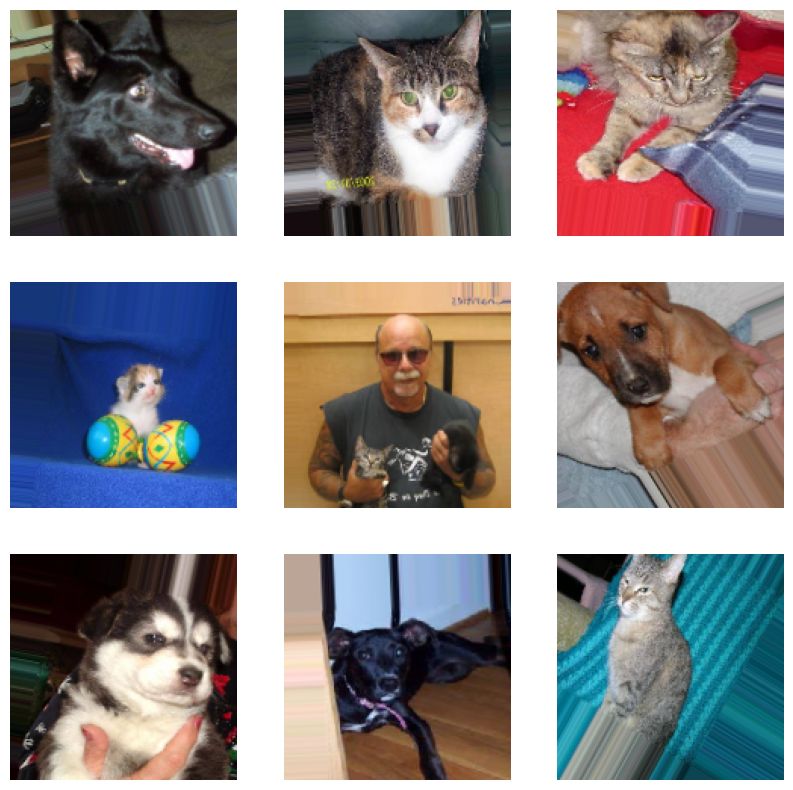

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


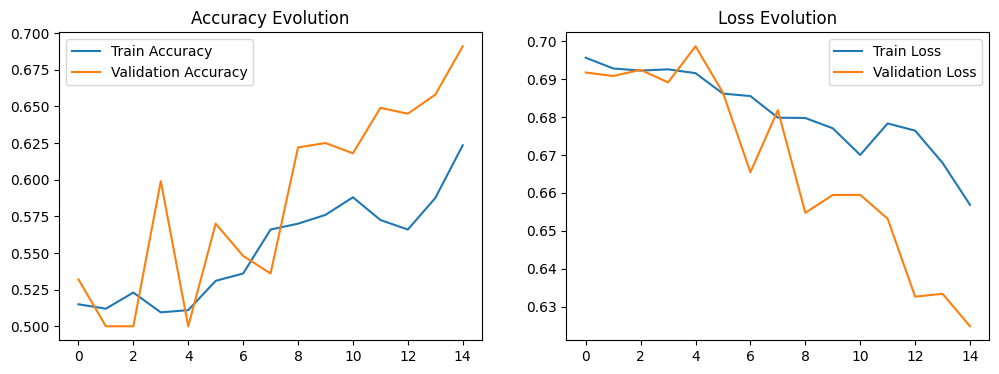

Modèle chargé depuis 'cats_vs_dogs_model.h5'


FileNotFoundError: [Errno 2] No such file or directory: 'test.jpg'

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
import matplotlib.pyplot as plt
import numpy as np

# Définition des chemins des données
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(dataset_path), "cats_and_dogs_filtered")
train_dir = os.path.join(data_dir, "train")
validation_dir = os.path.join(data_dir, "validation")

# Préparation des générateurs de données
image_size = (150, 150)
batch_size = 32

datagen_train = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_validation = ImageDataGenerator(rescale=1./255)

# Chargement des images depuis les dossiers
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Classification binaire (chien vs chat)
)

validation_generator = datagen_validation.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Affichage de quelques images pour vérification
def plot_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

plot_images(train_generator)

# Construction du modèle CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()

# Entraînement du modèle
epochs = 15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Sauvegarde du modèle
model.save("cats_vs_dogs_model.h5")
print("Modèle sauvegardé sous 'cats_vs_dogs_model.h5'")

# Visualisation des performances
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Evolution')
plt.show()

# Chargement du modèle sauvegardé
loaded_model = tf.keras.models.load_model("cats_vs_dogs_model.h5")
print("Modèle chargé depuis 'cats_vs_dogs_model.h5'")

# Test du modèle sur une nouvelle image
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(150, 150))  # Charger l'image
    img_array = img_to_array(img) / 255.0  # Normalisation
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    prediction = model.predict(img_array)[0][0]  # Prédiction
    label = "Chien" if prediction > 0.5 else "Chat"
    
    plt.imshow(img)
    plt.title(f"Prédiction : {label}")
    plt.axis("off")
    plt.show()

# Exécuter la prédiction sur une image de test (remplace 'test.jpg' par ton image)
predict_image("test.jpg", loaded_model)
